https://onnxruntime.ai/docs/get-started/with-python.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [2]:
# データの読み込み
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv"
data = pd.read_csv(url)

# 必要な列の抽出
data = data[['weight', 'height', 'sex']]

# 性別のエンコード
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

# 特徴量とターゲットの分割
X = data[['weight', 'height']]
y = data['sex']

# 訓練データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
#X.values

In [4]:
# ロジスティック回帰モデルの作成
model = LogisticRegression()
model.fit(X_train.values, y_train.values)

LogisticRegression()

In [12]:
import joblib
joblib.dump(model, "model.pkl")

['model.pkl']

In [5]:
y_pred = model.predict(X_test.values)
t, f = 0, 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test.values[i]:
        print('TRUE')
        t += 1
    else:
        print('FALSE')
        f += 1
print(t, f)

TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
FALSE
TRUE
32 8


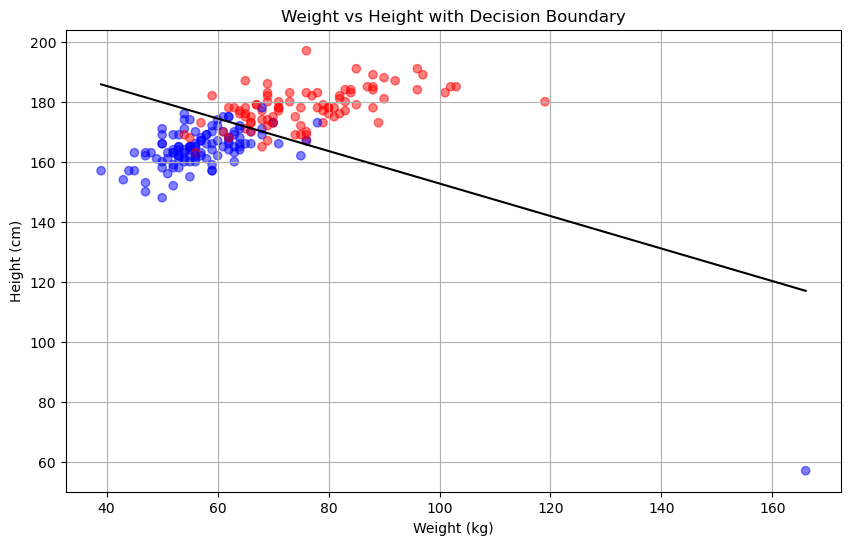

In [6]:
# 散布図の作成
plt.figure(figsize=(10, 6))
plt.scatter(data['weight'], data['height'], c=data['sex'], cmap='bwr', alpha=0.5)
plt.title('Weight vs Height with Decision Boundary')
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.grid(True)

# 分類境界線の描画
coef = model.coef_[0]
intercept = model.intercept_
x_values = np.linspace(data['weight'].min(), data['weight'].max(), 200)
y_values = -(coef[0] * x_values + intercept) / coef[1]
plt.plot(x_values, y_values, color='black')

plt.show()

In [7]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [8]:
initial_type = [('float_input', FloatTensorType([None, 2]))]
onx = convert_sklearn(model, initial_types=initial_type)
with open("logistic_davis.onnx", "wb") as f:
    f.write(onx.SerializeToString())

In [13]:
import numpy
import onnxruntime as rt

sess = rt.InferenceSession("logistic_davis.onnx")
input_name = sess.get_inputs()[0].name
pred_onx = sess.run(None, {input_name: X_test.values.astype(numpy.float32)})[0]
print(pred_onx)

[0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0]


In [10]:
import numpy
import onnxruntime as rt

sess = rt.InferenceSession("logistic_davis.onnx")
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name
pred_onx = sess.run(
    [label_name], {input_name: X_test.values.astype(numpy.float32)})[0]
print(pred_onx)

[0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0]


In [11]:
t, f = 0, 0
for i in range(len(pred_onx)):
    if pred_onx[i] == y_test.values[i]:
        print('TRUE')
        t += 1
    else:
        print('FALSE')
        f += 1
print(t, f)

TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
TRUE
TRUE
FALSE
TRUE
TRUE
FALSE
TRUE
32 8
